In [222]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [223]:
df = pd.read_csv('strategy_performance_all.csv')
df.head()

,timestamp,strategy_id,total_trades,successful_trades,win_rate,risk_of_ruin,rate_of_return,annualized_return,annualized_volatility,total_pnl,...,max_consecutive_wins,max_consecutive_losses,max_drawdown,recovery_factor,skewness,kurtosis,calmar_ratio,var,cvar,ulcer_index
0,1682636619,ETHUSDT_1m_STRTGAOBB5:34:25:2:50:14:40:60:1.4:...,376,196,0.521277,98.452220,0.073747,0.048844,0.097726,140.9200,...,7,6,0.089069,1582.149186,0.865614,6.494395,0.827982,0.009116,23.990000,0.033676
1,1682674975,ETHUSDT_1m_STRTGBBE20:2:1.5_TKPRFTRSKRWRD1.5_S...,173,97,0.560694,95.947469,-0.164399,-0.230196,0.514763,-314.1410,...,11,6,0.467468,0.000000,-8.457108,97.845236,-0.351679,0.024349,150.010000,0.287937
2,1682636614,ETHUSDT_1m_STRTGFVGZLMA100:14:70:30:40:0.5:0.0...,425,179,0.421176,107.414183,-0.398388,-0.260144,0.166039,-761.2600,...,8,12,0.415853,0.000000,-0.563416,2.268780,-0.958004,0.018894,51.410476,0.236295
3,1682636618,ETHUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5_...,477,185,0.387841,111.685440,0.085115,0.044099,0.134637,162.6416,...,7,17,0.167686,969.916066,0.132506,1.731345,0.507584,0.013175,37.217391,0.080754
4,1682636615,ETHUSDT_1m_STRTGEEBB20:2:1.5_TKPRFTRSKRWRD1.5_...,22,9,0.409091,108.863511,0.059387,0.936380,0.174415,113.4800,...,2,3,0.015505,7319.016793,2.413438,6.394402,3.830244,0.004836,22.080000,0.005462


In [224]:
df = df[df['total_trades'] > 30]

In [225]:
downside_columns = ['max_drawdown', 'average_pnl', 'risk_of_ruin', 'profit_factor', 'sharpe_ratio', 'sortino_ratio', 'calmar_ratio', 'cvar', 'ulcer_index']
downside_df = df[downside_columns]

In [226]:
scaler = StandardScaler()
downside_df_scaled = scaler.fit_transform(downside_df)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

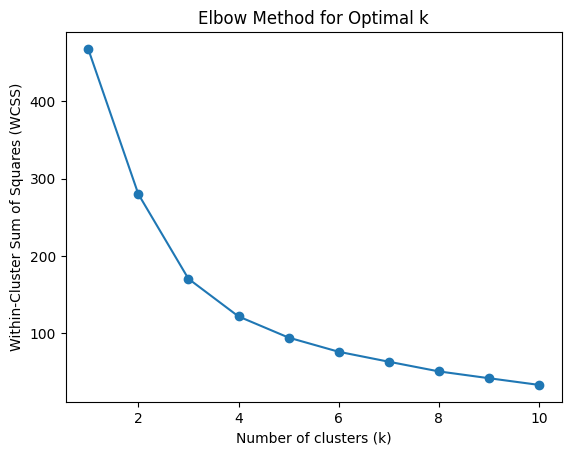

In [227]:
k_values = range(1, 11)

wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(downside_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [228]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(downside_df_scaled)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [229]:
df['cluster'] = clusters

In [230]:
cluster_averages = df.groupby('cluster')['max_drawdown'].mean()
poorest_cluster = cluster_averages.idxmin()
poorest_cluster

2

In [233]:
good_strategies_df = df[(df['cluster'] is not poorest_cluster and df['total_pnl'] > 0)]
good_strategies_df = good_strategies_df.sort_values(by='total_pnl', ascending=False)
good_strategies_df.head(10)

,timestamp,strategy_id,total_trades,successful_trades,win_rate,risk_of_ruin,rate_of_return,annualized_return,annualized_volatility,total_pnl,...,max_consecutive_losses,max_drawdown,recovery_factor,skewness,kurtosis,calmar_ratio,var,cvar,ulcer_index,cluster
3,1682636618,ETHUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5_...,477,185,0.387841,111.685440,0.085115,0.044099,0.134637,162.641600,...,17,0.167686,969.916066,0.132506,1.731345,0.507584,0.013175,37.217391,0.080754,0
0,1682636619,ETHUSDT_1m_STRTGAOBB5:34:25:2:50:14:40:60:1.4:...,376,196,0.521277,98.452220,0.073747,0.048844,0.097726,140.920000,...,6,0.089069,1582.149186,0.865614,6.494395,0.827982,0.009116,23.990000,0.033676,0
36,1682687230,AVAXUSDT_5m_STRTGEZLMA100:20:20:0.002:0.05:1.5...,610,278,0.455738,103.781428,0.018436,0.007575,0.006035,35.228250,...,12,0.007121,4947.398744,1.393994,9.397298,2.589111,0.000397,1.416833,0.002991,0
17,1682656539,UNFIUSDT_5m_STRTGBBE20:2:1.5_TKPRFTRSKRWRD1.5_...,104,64,0.615385,93.084903,0.018298,0.044915,0.014946,34.964057,...,4,0.000638,54767.891830,8.572060,78.813313,28.661553,0.000100,0.277792,0.000187,2
55,1682765991,ADAUSDT_3m_STRTGEZLMA100:20:20:0.002:0.05:1.5_...,721,331,0.459085,103.464683,0.016484,0.005731,0.003679,31.498254,...,15,0.004818,6538.014650,2.809160,38.732998,3.421524,0.000100,0.301043,0.001783,0
14,1682695608,ETCUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5_...,875,356,0.406857,109.143037,0.014951,0.004283,0.004126,28.569200,...,10,0.002728,10473.066580,8.404294,115.405223,5.480846,0.000100,0.285251,0.001261,0
60,1682772229,MATICUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1....,946,369,0.390063,111.372334,0.013637,0.003615,0.004212,26.057765,...,15,0.003952,6592.899346,9.570850,142.781969,3.450247,0.000100,0.190951,0.001301,0
6,1682643901,ETCUSDT_3m_STRTGEZLMA100:20:20:0.002:0.05:1.5_...,711,320,0.450070,104.330805,0.013553,0.004783,0.004882,25.897050,...,9,0.004815,5377.861357,6.242837,73.217653,2.814384,0.000273,0.815143,0.002115,0
45,1682694894,UNFIUSDT_3m_STRTGBBE20:2:1.5_TKPRFTRSKRWRD1.5_...,344,182,0.529070,97.922048,0.012802,0.009362,0.003968,24.462871,...,5,0.001605,15245.833110,4.333756,27.975600,7.978566,0.000101,0.374471,0.000589,0
39,1682687639,XRPUSDT_1m_STRTGEZLMA100:20:20:0.002:0.05:1.5_...,884,312,0.352941,117.260850,0.010084,0.002864,0.003769,19.269786,...,13,0.002598,7417.439814,5.876871,49.585681,3.881752,0.000100,0.190951,0.000914,0
